In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
X=df.iloc[:,3:13]
y=df['Exited']

In [20]:
geography=pd.get_dummies(X.Geography, drop_first=True)
gender=pd.get_dummies(X.Gender, drop_first=True)

In [21]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [22]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Gender','Geography'],axis=1)

In [23]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#we did this as giving the train data in fit and in transform we gave test data just to avoid data leakage
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
#In Keras, "dense" usually refers to a single layer, whereas "sequential" usually refers to an entire model, not just one layer.
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [28]:
#here the sequential allows you to create the whole model or initializing th ANN
classifier=Sequential()

In [63]:
#now we add the layers in it
#units is our number of neurons and the kernal_initializer is our weight initializer technique
#input_dim is our input which we would be giving to our 6 neurons and since the input of features is 11 so input_dim would be 11 as well

#this is the first layer of our nn
classifier.add(Dense(units=20, kernel_initializer='he_uniform', activation='LeakyReLU', input_dim=11 ))
classifier.add(Dropout(0.4))
#this is the second layer
classifier.add(Dense(units=15, kernel_initializer='he_uniform', activation='LeakyReLU' ))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='LeakyReLU' ))
classifier.add(Dropout(0.2))


# Adding the output layer

#output_dim is 1 becz we need only 1 output either 1 or 0 here the weight initializer was taken glorot uniform
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
#now we compile all the layers and will add the optimizers etc

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set

#validation_split is Fraction of the training data to be used as validation data. The model will set apart this fraction of the training 
#data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 120)

Epoch 1/120
536/536 [==============================] - 3s 4ms/step - loss: 0.5646 - accuracy: 0.7709 - val_loss: 0.5105 - val_accuracy: 0.7955
Epoch 2/120
536/536 [==============================] - 2s 3ms/step - loss: 0.5223 - accuracy: 0.7964 - val_loss: 0.5067 - val_accuracy: 0.7955
Epoch 3/120
536/536 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 4/120
536/536 [==============================] - 2s 3ms/step - loss: 0.5176 - accuracy: 0.7962 - val_loss: 0.5074 - val_accuracy: 0.7955
Epoch 5/120
536/536 [==============================] - 2s 3ms/step - loss: 0.5162 - accuracy: 0.7962 - val_loss: 0.5070 - val_accuracy: 0.7955
Epoch 6/120
536/536 [==============================] - 2s 3ms/step - loss: 0.5135 - accuracy: 0.7962 - val_loss: 0.5068 - val_accuracy: 0.7955
Epoch 7/120
536/536 [==============================] - 2s 3ms/step - loss: 0.5135 - accuracy: 0.7962 - val_loss: 0.5067 - val_accuracy: 0.7955

In [64]:
y_pred = classifier.predict(X_test)

In [65]:
#y_pred ma hamare pass points ma values arhi ha 
#since we know that we picked up sigmoid function so where 0.5> values should be picked up
y_pred = (y_pred > 0.5)

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [67]:
print(cm)

[[1595    0]
 [ 405    0]]


In [68]:
print(score)

0.7975


In [71]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


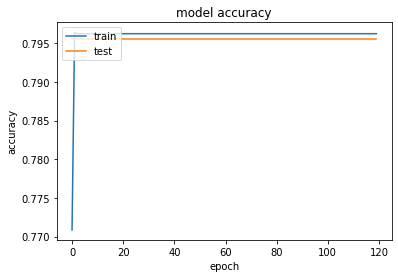

In [72]:
#checking the accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

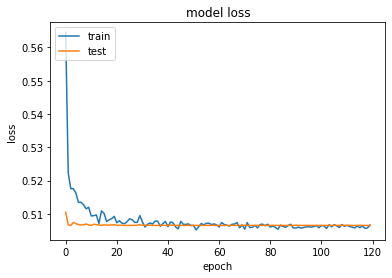

In [73]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()